<a href="https://colab.research.google.com/github/nandsra21/Text-Based-CNNs-Predicting-Genetic-Poplulation-Structure/blob/master/Pioneer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pandas

     |████████████████████████████████| 10.4 MB 4.3 MB/s 
     |████████████████████████████████| 14.5 MB 78.9 MB/s 
     |████████████████████████████████| 510 kB 67.5 MB/s 


In [ ]:
!cat /proc/cpuinfo
!df -h

In [ ]:
 !cat /proc/meminfo

In [ ]:
!export PYTHONPATH=$PATH:/home/nandsra21/.local/bin
!export PYTHONPATH=$PATH:/home/nandsra21/.local/lib/
!export PATH=$PATH:/home/nandsra21/.local/bin
!export PATH=$PATH:/home/nandsra21/.local/lib/

In [ ]:
#!gsutil cp gs://pioneer-project-bucket/sequences.fasta .
!gsutil cp gs://pioneer-project-bucket/simulated_HA_sequences_2.fasta .

Copying gs://pioneer-project-bucket/simulated_HA_sequences_2.fasta...
| [1 files][ 13.0 GiB/ 13.0 GiB]   62.8 MiB/s                                   
Operation completed over 1 objects/13.0 GiB.                                     


In [ ]:
#!gsutil cp gs://pioneer-project-bucket/aligned.fasta .

!gsutil cp gs://pioneer-project-bucket/tree.nwk .

ServiceException: 401 Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object.


In [ ]:
!gsutil cp gs://pioneer-project-bucket/metadata.tsv .

Copying gs://pioneer-project-bucket/metadata.tsv...
\
Operation completed over 1 objects/111.7 MiB.                                    


In [ ]:
!gsutil ls

gs://pioneer-project-bucket/


### load packages

In [ ]:
!pip3 install Biopython
!pip3 install talos
!pip3 install tensorflow

In [ ]:
!pip3 install matplotlib
!pip3 install scipy

In [ ]:
#!pip3 install keras
!pip3 install scikit-learn
!pip3 install seaborn

In [ ]:
!pip3 install keras

In [ ]:
import sys
sys.path

In [ ]:
import math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import pandas as pd
from Bio import SeqIO
import scipy
import keras as kr
import re
from sklearn.model_selection import train_test_split
from tensorflow import feature_column
from tensorflow.keras import layers
import os
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
# to do: run simulation with just 300K strains

In [ ]:
del strains
del genomes

In [ ]:
random_list = random.sample(range(3000000), 250000)

In [ ]:
strains = []
genomes = []
i = 0
for record in SeqIO.parse('./simulated_HA_sequences_2.fasta', "fasta"):
  if(i < 120000):
    if(len(record.seq) == 1701):
      strains.append(str(record.id))
      genomes.append(str(record.seq))
  i = i + 1

In [ ]:
genomes

[]

In [ ]:
genomes = np.take(np.array(genomes), random_list)

In [ ]:
strains = np.take(np.array(strains), random_list)

In [ ]:
metadata = pd.read_csv("metadata.tsv", sep="\t")

/home/sravani_nanduri_sn_gmail_com/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
d = {range(1, 100): 1, range(101, 200): 2, range(201, 300): 3}

total_df['new_generation'] = total_df['generation'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))

In [ ]:
total_df

,strains,genomes,generation,new_generation
0,sample_4_1,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4,1
1,sample_4_2,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4,1
2,sample_4_3,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4,1
3,sample_4_4,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4,1
4,sample_4_5,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4,1
...,...,...,...,...
249995,sample_10000_96,ATGAAGACCATCATCGCCTTGAGCTATATTTTATGCCTCGTTTTTG...,10000,0
249996,sample_10000_97,ATGAAGACCATTATCGCATTGAGCTATATTTTATGTCTCGTTTTTG...,10000,0
249997,sample_10000_98,ATGAAGACCATTATCGCATTGAGCTATATTTTATGTCTCGTTTTTG...,10000,0
249998,sample_10000_99,ATGAAGACCATCATCGCATTGAGCTATATTTTATGTCTCGTTTTTG...,10000,0


In [ ]:
total_df["generation"].value_counts()

8188    100
4008    100
4904    100
4776    100
4648    100
       ... 
9808    100
1492    100
9680    100
1364    100
8196    100
Name: generation, Length: 2500, dtype: int64

In [ ]:
sampled_df = total_df.where(total_df['new_generation'] > 0).dropna()
#.sample(n=1000, random_state=1)

In [ ]:
sampled_df_upgma = sampled_df.sample(n=1000, random_state=1)

In [ ]:
sampled_df

,strains,genomes,generation,new_generation
0,sample_4_1,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4.0,1.0
1,sample_4_2,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4.0,1.0
2,sample_4_3,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4.0,1.0
3,sample_4_4,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4.0,1.0
4,sample_4_5,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,4.0,1.0
...,...,...,...,...
7395,sample_296_96,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,296.0,3.0
7396,sample_296_97,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTTG...,296.0,3.0
7397,sample_296_98,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,296.0,3.0
7398,sample_296_99,ATGAAGACTATCATTGCTTTGAGCTACATTTTATGTCTGGTTTTCG...,296.0,3.0


In [ ]:
del i 

In [ ]:
len(genomes)

10001

In [ ]:
#!pip3 install numpy
import numpy as np

In [ ]:
!sudo apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz
!pip3 install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.0.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .config("spark.driver.memory", "60g") \
    .appName('Test App') \
    .getOrCreate()

In [ ]:
spark.sparkContext.defaultParallelism

8

In [ ]:
#@title Kimura Distance Code - old
def get_kimura2p_distances(genomes, length):
    """Calculate pairwise Kimura distances between the given list of genomes
    and return the nonredundant array of values for use with scipy's squareform function.
    Bases other than standard nucleotides (A, T, C, G) are ignored.
    Parameters
    ----------
    genomes : list
        a list of strings corresponding to genomes that should be compared
    Returns
    -------
    list
        a list of distinct Hamming distances as a vector-form distance vector
    >>> genomes = ["ATGCT", "ATGCT", "ACGCT"]
    >>> get_hamming_distances(genomes)
    [0, 1, 1]
    >>> genomes = ["AT-GCT", "AT--CT", "AC--CT"]
    >>> get_hamming_distances(genomes)
    [0, 1, 1]
    """
    # Define an array of valid nucleotides to use in pairwise distance calculations.
    # Using a numpy array of byte strings allows us to apply numpy.isin later.
    nucleotides = np.array([b'A', b'T', b'C', b'G'])
    bases = {b'A':0, b'G':0, b'C':1, b'T':1, b'N':-1}
    # Convert genome strings into numpy arrays to enable vectorized comparisons.
    genome_arrays = [
        np.frombuffer(genome.encode(), dtype="S1")
        for genome in genomes
    ]

    # Precalculate positions of valid bases (A, T, C, and G) in each genome to speed up later comparisons.
    valid_bases = [
        np.isin(genome_array, nucleotides)
        for genome_array in genome_arrays
    ]

    kimura_distances = []
    for i in range(len(genomes)):
      # Only compare the current genome, i, with all later genomes.
      # This avoids repeating comparisons or comparing each genome to itself.
      for j in range(i + 1, len(genomes)):
          # Find all mismatches between these two genomes.

          mismatches = list(np.nonzero(genome_arrays[i] != genome_arrays[j])[0])

          base_values_i = np.array([bases.get(genome_arrays[i][k]) for k in mismatches])
          base_values_j = np.array([bases.get(genome_arrays[j][k]) for k in mismatches])

          transversions = (base_values_i != base_values_j).sum() / float(length)
          transitions = (base_values_i == base_values_j).sum() / float(length)

          kimura_distance = -.5 * np.log((1 - 2 * transitions - transversions) * math.sqrt(1 - 2 * transversions))

          kimura_distances.append(kimura_distance)

    return kimura_distances

In [ ]:
#@title dad code
def get_distance(i):
  hamming_d=[]
  for j in range(i+1, len(genomes)):
    mismatches = genome_arrays[i] != genome_arrays[j]

    valid_bases = [
      np.isin(genome_arrays[i], nucleotides),
      np.isin(genome_arrays[j], nucleotides)
    ]
    hamming_d.append((mismatches & valid_bases[0] & valid_bases[1]).sum())
  return hamming_d


length = 1701
nucleotides = np.array([b'A', b'T', b'C', b'G'])

# Convert genome strings into numpy arrays to enable vectorized comparisons.
genome_arrays = [
    np.frombuffer(genome.encode(), dtype="S1")
    for genome in genomes
]

count = spark.sparkContext.parallelize(range(0, len(genomes)),1000).map(get_distance).collect()


hamming_distances.append(count)

#print(len(count))


In [ ]:
def get_hamming_distances(genomes):
    """Calculate pairwise Hamming distances between the given list of genomes
    and return the nonredundant array of values for use with scipy's squareform function.
    Bases other than standard nucleotides (A, T, C, G) are ignored.
    Parameters
    ----------
    genomes : list
        a list of strings corresponding to genomes that should be compared
    Returns
    -------
    list
        a list of distinct Hamming distances as a vector-form distance vector
    >>> genomes = ["ATGCT", "ATGCT", "ACGCT"]
    >>> get_hamming_distances(genomes)
    [0, 1, 1]
    >>> genomes = ["AT-GCT", "AT--CT", "AC--CT"]
    >>> get_hamming_distances(genomes)
    [0, 1, 1]
    """
    # Define an array of valid nucleotides to use in pairwise distance calculations.
    # Using a numpy array of byte strings allows us to apply numpy.isin later.
    nucleotides = np.array([b'A', b'T', b'C', b'G'])

    # Convert genome strings into numpy arrays to enable vectorized comparisons.
    genome_arrays = [
        np.frombuffer(genome.encode(), dtype="S1")
        for genome in genomes
    ]

    # Precalculate positions of valid bases (A, T, C, and G) in each genome to speed up later comparisons.
    valid_bases = [
        np.isin(genome_array, nucleotides)
        for genome_array in genome_arrays
    ]

    # Calculate Hamming distance between all distinct pairs of genomes at valid bases.
    # The resulting list is a reduced representation of a symmetric matrix that can be
    # converted to a square matrix with scipy's squareform function:
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html
    hamming_distances = []
    for i in range(len(genomes)):
        # Only compare the current genome, i, with all later genomes.
        # This avoids repeating comparisons or comparing each genome to itself.
        if(i % 100 == 0):
          print(i)
        for j in range(i + 1, len(genomes)):
            # Find all mismatches between these two genomes.
            mismatches = genome_arrays[i] != genome_arrays[j]

            # Count the number of mismatches where both genomes have valid bases.
            hamming_distances.append((mismatches & valid_bases[i] & valid_bases[j]).sum())

    return hamming_distances

In [ ]:
hamming_distance = get_hamming_distances(
    sampled_df_upgma["genomes"].values.tolist()
)
distance_matrix_upgma = squareform(hamming_distance)

0
100
200
300
400
500
600
700
800
900


In [ ]:
hamming_distance = get_hamming_distances(
    genomes_test
)
distance_matrix = squareform(hamming_distance)

0
100
200
300
400
500
600
700
800
900
1000
1100


In [ ]:
distance_matrix_df = pd.DataFrame(distance_matrix)
distance_matrix_df.to_csv("distance_matrix_least_recombinant.csv")

In [ ]:
distance_matrix = pd.read_csv("distance_matrix_least_recombinant.csv")

In [ ]:
distance_matrix = distance_matrix.values[:,1:]

In [ ]:
distance_matrix = similarity_matrix.values.tolist()

In [ ]:
distance_lower_triangle = np.tril(np.array(distance_matrix), k=0)

In [ ]:
type(distance_lower_triangle[0])

numpy.ndarray

In [ ]:
#@title Not used anymore:lower triangular matrix code
def create_lower_triangular_matrix(distance_lower_triangle, distance_matrix):
  distance_lower_triangle = distance_lower_triangle[distance_lower_triangle != 0]

  distance_lower_triangle_2 = []

  for i in range(0, len(distance_matrix)): 
      what_to_append = []
      for j in range(0, len(distance_matrix)):
          if(i > j): 
            what_to_append.append(distance_matrix[i][j]) 
      distance_lower_triangle_2.append(what_to_append) 
  return distance_lower_triangle_2    
      

In [ ]:
lower_triangle = create_lower_triangular_matrix(distance_lower_triangle, distance_matrix)

In [ ]:
#@title UPGMA
def lowest_cell(table):
    # Set default to infinity
    min_cell = float("inf")
    x, y = -1, -1

    # Go through every cell, looking for the lowest
    for i in range(len(table)):
        for j in range(len(table[i])):
            if table[i][j] < min_cell:
                min_cell = table[i][j]
                x, y = i, j

    # Return the x, y co-ordinate of cell
    return x, y


# join_labels:
#   Combines two labels in a list of labels
def join_labels(labels, a, b):
    # Swap if the indices are not ordered
    if b < a:
        a, b = b, a

    # Join the labels in the first index
    labels[a] = "(" + labels[a] + "," + labels[b] + ")"

    # Remove the (now redundant) label in the second index
    del labels[b]


# join_table:
#   Joins the entries of a table on the cell (a, b) by averaging their data entries
def join_table(table, a, b):
    # Swap if the indices are not ordered
    if b < a:
        a, b = b, a

    # For the lower index, reconstruct the entire row (A, i), where i < A
    row = []
    for i in range(0, a):
        row.append((table[a][i] + table[b][i])/2)
    table[a] = row
    
    # Then, reconstruct the entire column (i, A), where i > A
    #   Note: Since the matrix is lower triangular, row b only contains values for indices < b
    for i in range(a+1, b):
        table[i][a] = (table[i][a]+table[b][i])/2
        
    #   We get the rest of the values from row i
    for i in range(b+1, len(table)):
        table[i][a] = (table[i][a]+table[i][b])/2
        # Remove the (now redundant) second index column entry
        del table[i][b]

    # Remove the (now redundant) second index row
    del table[b]


# UPGMA:
#   Runs the UPGMA algorithm on a labelled table
def UPGMA(table, labels):
    # Until all labels have been joined...
    while len(labels) > 1:
        # Locate lowest cell in the table
        x, y = lowest_cell(table)

        # Join the table on the cell co-ordinates
        join_table(table, x, y)

        # Update the labels accordingly
        join_labels(labels, x, y)

    # Return the final label
    return labels[0]



In [ ]:
UPGMA_output = UPGMA(lower_triangle, genomes_df["strain"].values.tolist())

In [ ]:
import matplotlib
%matplotlib inline

In [ ]:
from Bio import Phylo

tree = Phylo.read("tree.nwk", "newick")
matplotlib.rc('font', size=6)
# set the size of the figure
fig = plt.figure(figsize=(50, 100), dpi=100)
# alternatively
# fig.set_size_inches(10, 20)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)

In [ ]:
plt.savefig("newick.png", dpi=100)

<Figure size 432x288 with 0 Axes>

In [ ]:
# Sum branch lengths from root to tips using preorder traversal.
tree.root.total_branch_length = 0.0
for node in tree.find_clades():
    for child in node.clades:
        child.total_branch_length = node.total_branch_length + child.branch_length
# Map total branch lengths to tip names.
branch_lengths = {
    tip.name: int((tip.total_branch_length * 1000))
    for tip in tree.find_clades(terminal=True)
}

In [ ]:
branch_lengths = pd.DataFrame.from_dict(branch_lengths, orient='index')

In [ ]:
branch_lengths.columns=["generation"]

In [ ]:
UPGMA_output[:200]

'((((((A/Alabama/13/2016,((((A/Missouri/16/2016,A/Texas/166/2016),A/Texas/176/2016),A/Texas/174/2016),A/Texas/173/2016)),((((((A/Colorado/11/2016,A/Oregon/02/2016),A/Texas/85/2016),(A/Texas/11/2016,A/Q'

In [ ]:
def create_time_series_data(output_from_UPGMA, strains):
    count_parenthesis = 0
    strain_index = []
    parenthesis_list = []
    keep_count = []
    for i in range(0, len(strains)):
        strain_index.append(output_from_UPGMA.find(strains[i]))
    for i in strain_index:
        substring = output_from_UPGMA[0:i]
        keep_count.append(strains[strain_index.index(i)])
        parenthesis_list.append(substring.count("(") - substring.count(")"))
    return parenthesis_list, keep_count

In [ ]:
values, indices = create_time_series_data(UPGMA_output, genomes_df["strain"].values.tolist())

In [ ]:
values = np.array(values)

In [ ]:
!gsutil cp gs://pioneer-project-bucket/distance_matrix_least_recombinant.csv .

Copying gs://pioneer-project-bucket/distance_matrix_least_recombinant.csv...
/ [1 files][190.9 MiB/190.9 MiB]                                                
Operation completed over 1 objects/190.9 MiB.                                    


In [ ]:
distance_matrix = pd.read_csv("distance_matrix_least_recombinant.csv")


In [ ]:
distance_matrix = np.array(distance_matrix)[:,1:]

In [ ]:
distance_matrix_mean = distance_matrix_sampled.mean(axis=0)

In [ ]:
import pandas as pd
import multiprocessing as mp
import re

In [ ]:
genomes[:10]

In [ ]:
def pool_code(string_val):
  string_val = re.sub(r'[^AGCT]', '5', string_val)
  string_val = list((string_val.replace('A','1').replace('G','2').replace('C', '3').replace('T','4')))
  string_val = list(map(int, string_val)) 
  return string_val

In [ ]:
len(genomes)

9999

In [ ]:
numbers = genomes[:]
for i in range(0,len(genomes)):
    numbers[i] = re.sub(r'[^AGCT]', '5', numbers[i])
    numbers[i] = list(numbers[i].replace('A','1').replace('G','2').replace('C', '3').replace('T','4'))
    numbers[i] = list(map(int, numbers[i]))

genomes_df = pd.DataFrame(numbers)

In [ ]:
genomes_df["strain"] = strains_test
branch_lengths["strain"] = branch_lengths.index

In [ ]:
genomes_df = genomes_df.merge(branch_lengths, on="strain")

In [ ]:
genomes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
1,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
2,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
3,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
4,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1


In [ ]:
#create a thread pool 10
pool = mp.Pool(10)

results = pool.map(pool_code,genomes)
print(results[0])
print(results[301])
print(results[601])

In [ ]:
p=mp.Pool(4)

results = p.map(create_genome_df,genomes[:100])

In [ ]:
genomes_df = pd.DataFrame(genomes)

In [ ]:
genomes_df

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
1,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
2,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
3,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
4,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
119996,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
119997,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1
119998,1,4,2,1,1,2,1,3,4,1,...,4,4,2,3,1,4,4,4,2,1


In [ ]:
validation_df = pd.DataFrame(metadata["generation"].values.tolist())
validation_df

,0
0,4
1,4
2,4
3,4
4,4
...,...
3011078,7672
3011079,7672
3011080,7672
3011081,7672


In [ ]:
#!pip3 install hdbscan
#!pip3 uninstall umap -y
!pip3 uninstall seaborn -y
!pip3 install seaborn
!pip3 install 'umap-learn==0.4.6'

In [ ]:
len(distance_matrix)
similarity_matrix = pd.DataFrame(distance_matrix, index=strains_test, columns=strains_test)
indices_to_drop = similarity_matrix[~similarity_matrix.index.isin(genomes_df["strain"])].dropna(how = 'all')
similarity_matrix = similarity_matrix[similarity_matrix.index.isin(genomes_df["strain"])].dropna(how = 'all')
similarity_matrix = similarity_matrix.drop(indices_to_drop.index, axis=1)
similarity_matrix

,A/Alabama/13/2016,A/Missouri/16/2016,A/Texas/166/2016,A/Texas/176/2016,A/Texas/174/2016,A/Texas/173/2016,A/Colorado/11/2016,A/Oregon/02/2016,A/Texas/85/2016,A/Texas/11/2016,...,A/Thailand/CU-B20791/2017,A/Thailand/CU-B21378/2017,A/Japan/5983/2017,A/Victoria/603/2017,A/Victoria/692/2017,A/Keelung/0023/2016,A/India/1733862/2017,A/India/1733873/2017,A/HongKong/3391/2017,A/MUWRP-Uganda/579/2016
A/Alabama/13/2016,0,4,6,6,7,7,16,14,12,17,...,42,44,52,64,60,49,63,57,39,37
A/Missouri/16/2016,4,0,2,2,3,3,12,10,10,13,...,38,40,48,60,56,45,60,54,37,35
A/Texas/166/2016,6,2,0,4,3,3,12,10,10,13,...,38,40,48,60,56,45,60,54,39,35
A/Texas/176/2016,6,2,4,0,5,5,14,12,12,15,...,40,42,50,60,56,47,62,56,39,37
A/Texas/174/2016,7,3,3,5,0,4,13,11,11,14,...,39,41,47,59,55,46,59,53,40,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A/Keelung/0023/2016,49,45,45,47,46,46,41,41,41,40,...,31,29,31,40,36,0,45,41,32,46
A/India/1733862/2017,63,60,60,62,59,61,56,56,56,52,...,45,38,38,42,38,45,0,16,47,60
A/India/1733873/2017,57,54,54,56,53,55,50,50,50,46,...,41,34,34,38,34,41,16,0,43,56
A/HongKong/3391/2017,39,37,39,39,40,38,35,35,35,34,...,31,29,37,45,41,32,47,43,0,41


In [ ]:
from sklearn.manifold import TSNE
import hdbscan
embedding_class = TSNE
#embedder = umap.UMAP(metric = "precomputed", n_neighbors=200,min_dist=.05,n_components=2)
embedding_parameters = {
    "metric": "precomputed",
    "learning_rate": 100,
    "perplexity": 15,
    "n_components" : 2
}

embedder = embedding_class(**embedding_parameters)
embedding = embedder.fit_transform(similarity_matrix)

print(embedding)

embedding_df = pd.DataFrame(embedding)
embedding_df.index = similarity_matrix.index


[[ 24.995768   -51.515617  ]
 [ 25.354292   -51.32378   ]
 [ 25.464386   -51.259544  ]
 ...
 [-44.46171      4.5397816 ]
 [ 59.847168    -0.16363183]
 [ 29.881681   -48.05344   ]]


In [ ]:
embedding_df.columns = ["tsne_x" , "tsne_y"]

clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
clusterer.fit(embedding)
embedding_df["label"] = predict
embedding_df["HD_label"] = genomes_df["generation"].values.tolist()

In [ ]:
embedding_df['label'].unique()

array([24])

In [ ]:
len(values)

1147

In [ ]:
embedding_df["label_UPGMA"] = values

In [ ]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [ ]:
#!pip3 install altair
import altair as alt
selection = alt.selection_multi(fields=["HD_label"])
chart = alt.Chart(embedding_df).mark_circle(size=60).encode(
    x=alt.X("tsne_x", title="t-SNE_x"),
    y=alt.X("tsne_y", title="t-SNE_y"),
    color= "label_UPGMA:N"
)

chart2 = alt.Chart(embedding_df).mark_circle(size=60).encode(
    x=alt.X("tsne_x", title="t-SNE_x"),
    y=alt.X("tsne_y", title="t-SNE_y"),
    color= "HD_label:N"
)
#chart2 = alt.Chart(embedding_df).mark_circle(size=60).encode(
#    x=alt.X("tsne_x", title="TSNE_x"),
#    y=alt.X("tsne_y", title="TSNE_y"),
#    color="HD_label:N"
#)

In [ ]:
chart | chart2

alt.HConcatChart(...)

**Split Training set into Training and Validation sets**

In [ ]:
metadata_df = metadata.merge(pd.DataFrame(strains,columns=["strain"]), on="strain")

In [ ]:
metadata_df.head()

,strain,generation,fitness
0,sample_52_2,52,0.933861
1,sample_52_3,52,0.853535
2,sample_52_4,52,0.859951
3,sample_52_5,52,0
4,sample_52_6,52,0.653404


In [ ]:
max(metadata_df.values.tolist())

['sample_52_9999', 52, 0.9807597209338426]

In [ ]:
 X_train, X_val, y_train, y_val  = train_test_split(genomes_df.values.tolist(), metadata_df["generation"].values.tolist(), test_size=0.2, random_state=1)

In [ ]:
len(X_val)

24000

In [ ]:
#x_train, x_val, y_train, y_val = train_test_split(genomes_df_train_val.values.tolist(), validation_df_train_val.values.tolist(), test_size=.1, random_state=0)

In [ ]:
x_train = np.array(X_train)
x_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [ ]:
max(y_train)
min(y_train)

4

In [ ]:
max(genomes_df["generation"].values.tolist())
min(genomes_df["generation"].values.tolist())

4

## Single Classifier Training

In [ ]:
!pip3 install keras-tuner

In [ ]:
!pip3 install scikit-learn
!pip3 install keras-tuner

In [ ]:
from kerastuner import HyperModel
from sklearn.model_selection import GridSearchCV

In [ ]:
import os
 
if not os.path.exists("logs"):
    os.mkdir("logs")

In [ ]:
Y_train[:1]

NameError: ignored

**Constructing CNN**

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Embedding
from keras.layers import ThresholdedReLU
from keras.layers import Dropout
from keras.callbacks import TensorBoard

"""
Class to implement the Character Level Convolutional Neural Network for Text Classification,
as described in Zhang et al., 2015 (http://arxiv.org/abs/1509.01626)
"""
"""
Initialization for the Character Level CNN model.
Args:
input_size (int): Size of input features
alphabet_size (int): Size of alphabets to create embeddings for
embedding_size (int): Size of embeddings
conv_layers (list[list[int]]): List of Convolution layers for model
fully_connected_layers (list[list[int]]): List of Fully Connected layers for model
num_of_classes (int): Number of classes in data
threshold (float): Threshold for Thresholded ReLU activation function
dropout_p (float): Dropout Probability
optimizer (str): Training optimizer
loss (str): Loss function
"""
input_size = 1701
alphabet = "AGCTN"
alphabet_size = 5
embedding_size = 128
conv_layers = [[256,5],[256,5]]
fully_connected_layers = [1024,1024]
num_of_classes =  max(metadata_df["generation"].values.tolist()) + 1
threshold = 1e-6
dropout_p = 0.1
optimizer = "adam"
loss = "sparse_categorical_crossentropy"


checkpoint_every = 100
batch_size = 10
epochs = 10
training_inputs = X_train
training_labels = y_train
validation_inputs = X_val
validation_labels = y_val

"""
Build and compile the Character Level CNN model
Returns: None
"""
# Input layer
inputs = Input(shape=(input_size,), name='sent_input', dtype='int64')
# Embedding layers
x = Embedding((alphabet_size + 1), embedding_size, input_length=1701)(inputs)
# Convolution layers
iterator = 0
for cl in conv_layers:
  print(x.shape)
  x = Convolution1D(cl[0], cl[1])(x)
  x = ThresholdedReLU(threshold)(x)
  iterator = iterator + 1
x = Flatten()(x)
# Fully connected layers
for fl in fully_connected_layers:
  x = Dense(fl)(x)
  x = ThresholdedReLU(threshold)(x)
  x = Dropout(dropout_p)(x)
# Output layer
predictions = Dense(num_of_classes, activation='softmax')(x)
# Build and compile model
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=optimizer, loss=loss)
print("CharCNNZhang model built: ")
model.summary()

# Create callbacks
tensorboard = TensorBoard(log_dir='logs', histogram_freq=checkpoint_every, batch_size=batch_size,
              write_graph=True, write_grads=True, write_images=False,
              embeddings_freq=checkpoint_every,
              embeddings_layer_names=None)

# Start training
print("Training CharCNNZhang model: ")
model.fit(training_inputs, training_labels,
    validation_data=(validation_inputs, validation_labels),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    callbacks=[tensorboard])



In [ ]:
# create:
# confusion matrix
# loss vs epoch graph
# accuracy values
# t-SNE embedding of real data fit on the trained network for both MERS and flu (colored by the trained results and the real results)
# do this for the 10K sample (sampled via a random sampler) for both datasets, do this for 120K as well to see if t-sne results improve
# run classification test on the results (or cluster purity or something)
#If time: use scatterplots and KDE density to reveal that generation means something or can be defined as useful 

In [ ]:
print(model.history.history)

{'loss': [1.0342042446136475, 0.9904802441596985, 0.9852463603019714, 0.9835326075553894, 0.9853823781013489, 0.9844153523445129, 0.9846055507659912, 0.9828135371208191, 0.9838646650314331, 0.983290433883667], 'val_loss': [0.9985038042068481, 0.9889106154441833, 0.9908460378646851, 0.9903324842453003, 0.9919474720954895, 0.9888180494308472, 0.9899097084999084, 0.9941970705986023, 0.9907529950141907, 0.9940608143806458]}


Text(0.5, 1.0, 'Training and validation loss')

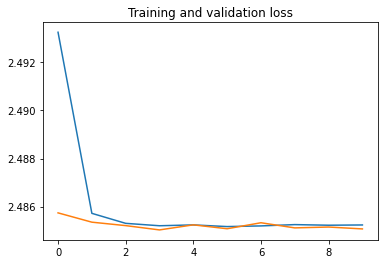

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
#acc = model.history.history['acc']
#val_acc = model.history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

# Get number of epochs
epochs = range(len(loss))

# Plot training and validation accuracy per epoch
#plt.plot(epochs, acc)
#plt.plot(epochs, val_acc)
#plt.title('Training and validation accuracy')

#plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir 'logs'

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Embedding
from keras.layers import ThresholdedReLU
from keras.layers import Dropout
from keras.callbacks import TensorBoard

"""
Class to implement the Character Level Convolutional Neural Network for Text Classification,
as described in Zhang et al., 2015 (http://arxiv.org/abs/1509.01626)
"""
"""
Initialization for the Character Level CNN model.
Args:
input_size (int): Size of input features
alphabet_size (int): Size of alphabets to create embeddings for
embedding_size (int): Size of embeddings
conv_layers (list[list[int]]): List of Convolution layers for model
fully_connected_layers (list[list[int]]): List of Fully Connected layers for model
num_of_classes (int): Number of classes in data
threshold (float): Threshold for Thresholded ReLU activation function
dropout_p (float): Dropout Probability
optimizer (str): Training optimizer
loss (str): Loss function
"""

"""
Build and compile the Character Level CNN model
Returns: None
"""
def create_model(batch_size=10, epochs=10, learn_rate=.001, dropout_rate=0.1):
  input_size = 1701
  alphabet = "12345"
  alphabet_size = 5
  embedding_size = 128
  conv_layers = [[256,5],[256,5]]
  fully_connected_layers = [1024,1024]
  num_of_classes =  max(validation_df.values.tolist())[0] + 1
  threshold = 1e-6
  dropout_p = 0.1
  optimizer = "adam"
  loss = "sparse_categorical_crossentropy"

  checkpoint_every = 100

  # Input layer
  inputs = Input(shape=(input_size,), name='sent_input', dtype='int64')
  # Embedding layers
  x = Embedding((alphabet_size + 1), embedding_size, input_length=1701)(inputs)
  # Convolution layers
  iterator = 0
  for cl in conv_layers:
    print(x.shape)
    x = Convolution1D(cl[0], cl[1])(x)
    x = ThresholdedReLU(threshold)(x)
    iterator = iterator + 1
  x = Flatten()(x)
  # Fully connected layers
  for fl in fully_connected_layers:
    x = Dense(fl)(x)
    x = ThresholdedReLU(threshold)(x)
    x = Dropout(dropout_rate)(x)
  # Output layer
  predictions = Dense(num_of_classes, activation='softmax')(x)
  # Build and compile model
  model = Model(inputs=inputs, outputs=predictions)
  optimizer = Adam(learning_rate=learn_rate)
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
  print("CharCNNZhang model built: ")
  model.summary()
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
training_inputs = x_train
training_labels = y_train
validation_inputs = x_val
validation_labels = y_val
testing_inputs = x_test
testing_labels =  y_test

In [ ]:
import tensorflow.python.keras.engine
from keras.engine import Layer, InputSpec
import tensorflow.keras

In [ ]:
batch_size = [1, 5, 10]
epochs = [10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_result = grid.fit(training_inputs, training_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.4, 0.8]
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(training_inputs, training_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
validation_data=(validation_inputs, validation_labels)

In [ ]:
 
  # Create callbacks
  tensorboard = TensorBoard(log_dir='/content/drive/My Drive/hierarchical-deep-cnn/logs', histogram_freq=checkpoint_every, batch_size=batch_size,
                write_graph=False, write_grads=True, write_images=False,
                embeddings_freq=checkpoint_every,
                embeddings_layer_names=None)

  # Start training
  print("Training CharCNNZhang model: ")
  model.fit(training_inputs, training_labels,
      validation_data=(validation_inputs, validation_labels),
      epochs=epochs,
      batch_size=batch_size,
      verbose=2,
      callbacks=[tensorboard])

In [ ]:
%tensorboard --logdir logs/scalars

In [ ]:
genomes_df_reduced = new_genomes_df.drop(["strain","generation","values"], axis=1)

In [ ]:
genomes_df["values"] = values
new_genomes_df = genomes_df.where(genomes_df["values"] < 49).dropna().reset_index(drop=True)

In [ ]:
new_genomes_df

,0,1,2,3,4,5,6,7,8,9,...,1694,1695,1696,1697,1698,1699,1700,strain,generation,values
0,1.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,3.0,1.0,4.0,4.0,4.0,2.0,1.0,A/Alabama/13/2016,8.0,6.0
1,1.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,3.0,1.0,4.0,4.0,4.0,2.0,1.0,A/Missouri/16/2016,7.0,10.0
2,1.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,3.0,1.0,4.0,4.0,4.0,2.0,1.0,A/Texas/166/2016,6.0,10.0
3,1.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,3.0,1.0,4.0,4.0,4.0,2.0,1.0,A/Texas/176/2016,6.0,9.0
4,1.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,3.0,1.0,4.0,4.0,4.0,2.0,1.0,A/Texas/174/2016,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,1.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,3.0,1.0,4.0,4.0,4.0,2.0,1.0,A/Keelung/0023/2016,5.0,4.0
1129,1.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,3.0,1.0,4.0,4.0,4.0,2.0,1.0,A/India/1733862/2017,11.0,5.0
1130,1.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,3.0,1.0,4.0,4.0,4.0,2.0,1.0,A/India/1733873/2017,11.0,7.0
1131,1.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,...,3.0,1.0,4.0,4.0,4.0,2.0,1.0,A/HongKong/3391/2017,10.0,12.0


In [ ]:
# Evaluate inputs
results = model.evaluate(np.array(genomes_df_reduced.values.tolist()), np.array(new_genomes_df["values"].values.tolist()), batch_size=batch_size, verbose=1)
predictions = model.predict(genomes_df_reduced.values.tolist(), batch_size=batch_size, verbose=1)

114/114 [==============================] - 11s 96ms/step


In [ ]:
model.save("model_clonal_replicator_120K")


In [ ]:
import keras
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("model_clonal_replicator_120K")

In [ ]:
print("test loss, test acc:", results)
print("predictions shape:", predictions.shape)

test loss, test acc: 15.931331634521484
predictions shape: (1133, 49)


test loss, test acc: 15.931331634521484
predictions shape: (1133, 49)


<AxesSubplot:>

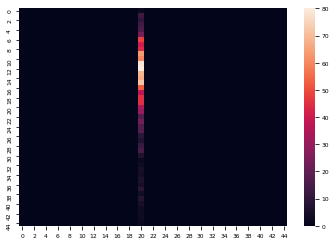

In [ ]:
# Evaluate inputs
predict = np.argmax(predictions,axis=1)

print("test loss, test acc:", results)
print("predictions shape:", predictions.shape)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(new_genomes_df["values"].values.tolist()), predict)

sns.heatmap(cm)


In [ ]:
# build confusion matrix(predicted class against actual class, make heatmap)
error_df = pd.DataFrame()
error_df["predictions"] = predictions
error_df["real"] = testing_inputs

error_df.head()

In [ ]:
np.unique(predict)

array([24])

In [ ]:

# build confusion matrix(predicted class against actual class, make heatmap)
error_df = pd.DataFrame()
error_df["predictions"] = predict
error_df["real"] = new_genomes_df["values"]
print(np.sum(predict == new_genomes_df["values"]))
print(np.sum(predict == new_genomes_df["values"]) / float(len(predict)))
error_df

34
0.03000882612533098


,predictions,real
0,24,6.0
1,24,10.0
2,24,10.0
3,24,9.0
4,24,8.0
...,...,...
1128,24,4.0
1129,24,5.0
1130,24,7.0
1131,24,12.0
